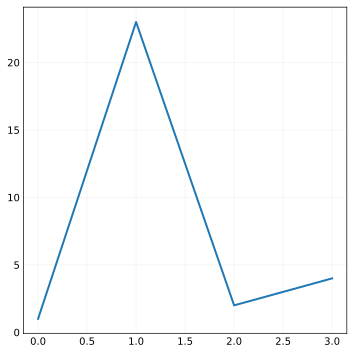

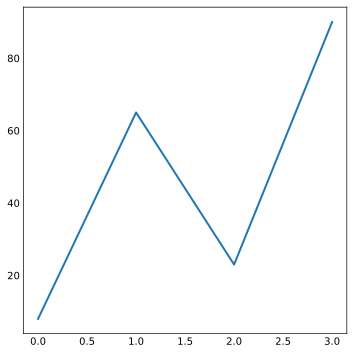

In [28]:
#| filename: stlesheet.py
#| include: false
#| label: fig-plots
#| fig-cap: "Plots" 
#| fig-subcap:
#|   - "Plot 1"
#|   - "Plot 2" 
#| layout-ncol: 2

# Some technical typsetting snippets:
import matplotlib.pyplot as plt
plt.plot([1,23,2,4])
plt.grid()
plt.show()

plt.plot([8,65,23,90])
plt.show()

<!--
Some technical typsetting snippets:

::: {.proof}
By induction.
:::

Black-Scholes (@eq-black-scholes) is a mathematical model that seeks to explain the behavior of financial derivatives, most commonly options:

$$
\frac{\partial \mathrm C}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2}
\frac{\partial^{2} \mathrm C}{\partial \mathrm C^2}
  + \mathrm r \mathrm S \frac{\partial \mathrm C}{\partial \mathrm S}\ =
  \mathrm r \mathrm C
$$ {#eq-black-scholes}

::: {#thm-line}

## Line

The equation of any straight line, called a linear equation, can be written as:

$$
y = mx + b
$$
:::

See @thm-line. (NOTE: not typst-compatible)

::: {#tip-example .callout-tip}
## Cross-Referencing a Tip

Add an ID starting with `#tip-` to reference a tip.
:::

See @tip-example...

See @fig-plots for examples. In particular, @fig-plots-2.
-->

[...]

## Imports

In [2]:
#| echo: false

# To render this notebook:
# 
#   $ quarto preview notebooks/report.ipynb
# 
# 
# For info on technical writing:
# https://quarto.org/docs/visual-editor/technical.html
# 
# For info on cross-references:
# https://quarto.org/docs/authoring/cross-references.html
# 
# For info on HTML options (_metadata.yml):
# https://quarto.org/docs/reference/formats/html.html
# 
# For info on website options (_quarto.yml):
# https://quarto.org/docs/reference/projects/websites.html
# 
# For info on code cell options (`#|`):
# https://quarto.org/docs/reference/cells/cells-jupyter.html
# 
# For info on article layouts:
# https://quarto.org/docs/authoring/article-layout.html
# 
# For info on figure layouts:
# https://quarto.org/docs/authoring/figures.html

import sys
from pathlib import Path

src_path = Path('..')
sys.path.append(str(src_path.resolve()))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from great_tables import GT
from pandas.plotting import scatter_matrix

from src.stylesheet import customize_plots
from src.inspection import make_df, display

In [4]:
#| include: false
%config InlineBackend.figure_format = 'svg'

In [5]:
#| include: false

# This is a test
def test(x):
    """
    This is a test.

    Parameters
    -----------
    x : int
        An integer.

    Returns
    -------
    y : int
        An integer.
    """
    y = x + 1
    return y

In [6]:
#| include: false
test(4)

5

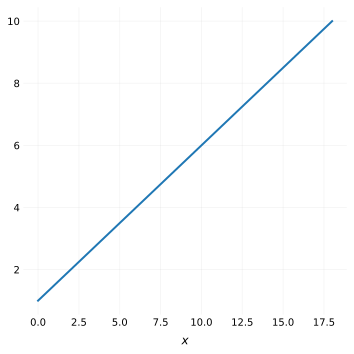

In [7]:
#| include: false
#| label: fig-lab
#| fig-cap: A figure caption

customize_plots()
x = np.linspace(1, 10, 19)

ax = plt.subplot(111)
ax.plot(x)
ax.set(xlabel="$x$", frame_on=False)
ax.grid()
plt.show()

In [8]:
#| include: false
df = make_df([1, 2, 3], ["A", "B", "C"])
display("df", "df.transpose()", globs=globals())


df
--- (3, 3) ---
    1   2   3
A  1A  2A  3A
B  1B  2B  3B
C  1C  2C  3C


df.transpose()
--- (3, 3) ---
    A   B   C
1  1A  1B  1C
2  2A  2B  2C
3  3A  3B  3C




## The dataset

We begin by exploring the data to get to know the features and patterns on which we will base our analysis.

In [9]:
#| output: false
#| warning: false
#| code-fold: true

if 'data' not in locals():
    data = pd.read_csv(
        "../data/raw/PBJ_Daily_Nurse_Staffing_Q1_2024.zip",
        encoding='ISO-8859-1'
    )
else:
    print("data loaded.")

/var/folders/1l/bzgw9j4d1pl2c6j9ngntg5mh0000gn/T/ipykernel_1124/1604621082.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


In [10]:
data.sample(5)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
233053,115513,TWIN OAKS CONVALESCENT CENTER,ALMA,GA,Bacon,5,2024Q1,20240103,72,8.0,...,36.20,146.40,146.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1109690,46A058,MAPLE RIDGE REHABILITATION AND NURSING,SALT LAKE CITY,UT,Salt Lake,35,2024Q1,20240206,34,0.0,...,0.00,47.16,47.16,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1071036,445426,AHC BRIGHT GLADE,MEMPHIS,TN,Shelby,157,2024Q1,20240227,68,8.0,...,47.98,110.50,99.00,11.5,0.0,0.0,0.0,0.00,0.00,0.0
902705,366234,COLONIAL NURSING CENTER OF ROCKFORD,ROCKFORD,OH,Mercer,107,2024Q1,20240317,17,0.0,...,0.00,38.25,38.25,0.0,0.0,0.0,0.0,0.00,0.00,0.0
924408,375124,SEQUOYAH POINTE SKILLED NURSING AND THERAPY,TAHLEQUAH,OK,Cherokee,21,2024Q1,20240131,59,8.0,...,0.00,80.92,80.92,0.0,0.0,0.0,0.0,14.83,14.83,0.0


In [11]:
# TODO: pivot on day

data_pivoted = data.pivot_table(
    index="STATE",
    columns="WorkDate",
    values="Hrs_RN",
    aggfunc='mean'
)

# Resetting the index for easier column access
# data_pivoted.reset_index(inplace=True)
data_pivoted

WorkDate,20240101,20240102,20240103,20240104,20240105,20240106,20240107,20240108,20240109,20240110,...,20240322,20240323,20240324,20240325,20240326,20240327,20240328,20240329,20240330,20240331
STATE,,,,,,,,,,,,,,,,,,,,,
AK,55.602000,51.898667,51.343333,59.512000,64.569333,58.176000,57.300000,60.578000,58.515333,59.689333,...,62.525333,53.939333,57.629333,63.704000,63.604000,63.441333,65.700000,68.357333,54.641333,54.074000
AL,26.901570,39.632601,40.746816,40.160404,38.657937,26.692466,26.345874,38.713184,40.700897,41.691390,...,38.314529,26.940000,26.800493,39.800852,41.089238,40.966502,39.004753,36.495605,27.455964,26.797085
AR,11.224470,12.514240,13.073456,13.465346,12.282304,12.595714,12.768341,13.161244,13.578756,13.734608,...,13.382811,13.832995,13.381382,13.655576,13.879217,13.432074,14.206129,13.426175,13.525300,11.958571
AZ,33.938777,36.368273,37.029137,36.852158,36.982302,33.031655,31.628849,38.353525,38.457194,38.849496,...,41.056331,34.905971,32.476691,40.276331,39.088633,40.678417,40.659353,39.422662,32.910216,31.528417
CA,29.643939,32.223912,32.686316,33.311368,32.586842,29.678272,29.393482,32.683263,33.510465,33.730807,...,34.460474,31.168947,30.193833,33.812158,34.870868,34.675798,34.780860,33.950561,30.720272,29.810675
CO,37.223095,40.186095,40.631190,40.072571,40.423095,38.004381,37.096857,40.466143,40.956571,43.137571,...,41.452905,38.295714,39.097857,43.101476,43.028905,41.711476,42.061190,40.556190,38.602524,38.213476
CT,35.593010,39.137245,40.845051,39.577806,38.820612,33.855204,34.137908,39.099490,40.483163,39.878827,...,39.189592,33.277602,31.573061,38.741531,40.119184,39.543520,40.140561,36.694745,32.471837,31.387959
DC,76.412353,96.951176,92.495294,93.214118,94.737647,89.853529,79.513529,93.113529,102.617647,98.691176,...,99.601765,92.243529,86.057647,94.458235,98.186471,92.970588,93.760000,88.358235,91.500588,76.418235
DE,48.073488,49.806977,52.222558,52.358140,50.613488,49.409535,48.332093,52.329767,55.013256,50.222791,...,49.123721,51.508837,48.232326,47.708140,50.664651,51.872558,48.328140,47.305116,45.268372,42.826744


In [24]:
data_pivoted.iloc[:, 1:]

WorkDate,20240102,20240103,20240104,20240105,20240106,20240107,20240108,20240109,20240110,20240111,...,20240322,20240323,20240324,20240325,20240326,20240327,20240328,20240329,20240330,20240331
STATE,,,,,,,,,,,,,,,,,,,,,
AK,51.898667,51.343333,59.512000,64.569333,58.176000,57.300000,60.578000,58.515333,59.689333,60.191333,...,62.525333,53.939333,57.629333,63.704000,63.604000,63.441333,65.700000,68.357333,54.641333,54.074000
AL,39.632601,40.746816,40.160404,38.657937,26.692466,26.345874,38.713184,40.700897,41.691390,41.597578,...,38.314529,26.940000,26.800493,39.800852,41.089238,40.966502,39.004753,36.495605,27.455964,26.797085
AR,12.514240,13.073456,13.465346,12.282304,12.595714,12.768341,13.161244,13.578756,13.734608,14.105069,...,13.382811,13.832995,13.381382,13.655576,13.879217,13.432074,14.206129,13.426175,13.525300,11.958571
AZ,36.368273,37.029137,36.852158,36.982302,33.031655,31.628849,38.353525,38.457194,38.849496,37.948273,...,41.056331,34.905971,32.476691,40.276331,39.088633,40.678417,40.659353,39.422662,32.910216,31.528417
CA,32.223912,32.686316,33.311368,32.586842,29.678272,29.393482,32.683263,33.510465,33.730807,33.616746,...,34.460474,31.168947,30.193833,33.812158,34.870868,34.675798,34.780860,33.950561,30.720272,29.810675
CO,40.186095,40.631190,40.072571,40.423095,38.004381,37.096857,40.466143,40.956571,43.137571,42.541476,...,41.452905,38.295714,39.097857,43.101476,43.028905,41.711476,42.061190,40.556190,38.602524,38.213476
CT,39.137245,40.845051,39.577806,38.820612,33.855204,34.137908,39.099490,40.483163,39.878827,40.956990,...,39.189592,33.277602,31.573061,38.741531,40.119184,39.543520,40.140561,36.694745,32.471837,31.387959
DC,96.951176,92.495294,93.214118,94.737647,89.853529,79.513529,93.113529,102.617647,98.691176,99.465882,...,99.601765,92.243529,86.057647,94.458235,98.186471,92.970588,93.760000,88.358235,91.500588,76.418235
DE,49.806977,52.222558,52.358140,50.613488,49.409535,48.332093,52.329767,55.013256,50.222791,52.626047,...,49.123721,51.508837,48.232326,47.708140,50.664651,51.872558,48.328140,47.305116,45.268372,42.826744


In [ ]:
(
    GT(data_pivoted, rowname_col="STATE")
    .fmt_nanoplot(
        columns=data_pivoted.columns[1:],
        reference_line="mean",
        reference_area=["min", "q1"]
    )
    .fmt_nanoplot(
        columns=data_pivoted.columns[1:],
        plot_type="bar",
        reference_line="max",
        reference_area=["max", "median"]
    )
)

In [79]:
#| include: false
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [80]:
#| include: true

data.describe().round(1)
# display(Markdown(data.describe().to_markdown()))

,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,...,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0
mean,91.1,20240215.7,83.4,5.2,5.1,0.1,10.3,10.0,0.2,34.4,...,6.5,171.2,158.2,13.0,4.2,4.2,0.1,8.5,8.3,0.2
std,99.2,83.0,49.1,4.5,4.5,0.9,14.9,14.6,1.8,34.7,...,16.2,113.7,106.3,32.6,13.1,12.7,2.1,17.6,17.2,2.2
min,1.0,20240101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,31.0,20240123.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,97.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,69.0,20240215.0,76.0,8.0,8.0,0.0,7.5,7.4,0.0,25.6,...,0.0,148.1,136.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,117.0,20240309.0,104.0,8.0,8.0,0.0,16.0,16.0,0.0,44.8,...,5.8,217.0,203.1,11.0,0.0,0.0,0.0,11.2,10.8,0.0
max,840.0,20240331.0,743.0,327.8,327.8,42.0,266.2,266.2,92.5,908.6,...,454.0,1857.7,1573.1,694.3,452.0,279.0,280.5,395.6,395.6,128.9


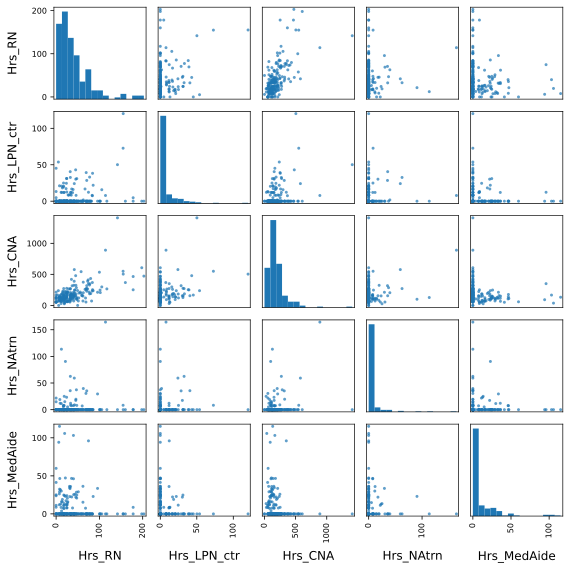

In [81]:
#| include: true
#| label: fig-scatter-matrix
#| fig-cap: Scatter matrix of nursing worker working hours
#| column: body-outset-right

attributes = ["Hrs_RN", "Hrs_LPN_ctr", "Hrs_CNA", "Hrs_NAtrn", "Hrs_MedAide"]
n = len(attributes)

fig, axs = plt.subplots(n, n, figsize=(8, 8))
scatter_matrix(
    data[attributes].sample(200),
    ax=axs, alpha=.7,
    hist_kwds=dict(bins=15, linewidth=0)
)
fig.align_ylabels(axs[:, 0])
fig.align_xlabels(axs[-1, :])
for ax in axs.flatten():
    ax.tick_params(axis='both', which='both', length=3.5)

# save_fig("scatter_matrix_plot")

plt.show()

In [125]:
from great_tables import GT

df = data.loc[150000:, [
    "STATE",
    "COUNTY_NAME", "COUNTY_FIPS",
    "CITY",
    "PROVNAME", "PROVNUM",
    # "MDScensus"
]].value_counts().reset_index()
GT(df.head(n=10))

STATE,COUNTY_NAME,COUNTY_FIPS,CITY,PROVNAME,PROVNUM,count
CA,Alameda,1,ALAMEDA,ALAMEDA HEALTHCARE & WELLNESS CENTER,555486,91
OH,Mahoning,99,AUSTINTOWN,AVENTURA AT HUMILITY HOUSE,366186,91
OH,Lucas,95,TOLEDO,OHIO LIVING SWAN CREEK,365996,91
OH,Lucas,95,TOLEDO,OTTERBEIN SUNSET HOUSE,366148,91
OH,Lucas,95,TOLEDO,PARK TERRACE NURSING AND REHABILITATION CENTER,365339,91
OH,Lucas,95,TOLEDO,POINT PLACE HEALTHCARE AND REHABILITATION CENTER,366039,91
OH,Lucas,95,WATERVILLE,ASTORIA PLACE OF WATERVILLE,365747,91
OH,Lucas,95,WATERVILLE,AYDEN HEALTHCARE OF WATERVILLE,365617,91
OH,Lucas,95,WHITEHOUSE,WHITEHOUSE COUNTRY MANOR,365756,91
OH,Madison,97,LONDON,LONDON HEALTH & REHAB CENTER,365241,91


## Some GT examples

In [83]:
#| include: false
from great_tables import GT, md, html
from great_tables.data import islands

islands_mini = islands.head(10)

(
    GT(islands_mini, rowname_col = "name")
    .tab_header(
        title="Large Landmasses of the World",
        subtitle="The top ten largest are presented"
    )
    .tab_source_note(
        source_note="Source: The World Almanac and Book of Facts, 1975, page 406."
    )
    .tab_source_note(
        source_note=md("Reference: McNeil, D. R. (1977) *Interactive Data Analysis*. Wiley.")
    )
    .tab_stubhead(label="landmass")
)

GT(_tbl_data=           name   size
0        Africa  11506
1    Antarctica   5500
2          Asia  16988
3     Australia   2968
4  Axel Heiberg     16
5        Baffin    184
6         Banks     23
7        Borneo    280
8       Britain     84
9       Celebes     73, _body=<great_tables._gt_data.Body object at 0x28b95e8d0>, _boxhead=Boxhead([ColInfo(var='name', type=<ColInfoTypeEnum.stub: 2>, column_label='name', column_align='left', column_width=None), ColInfo(var='size', type=<ColInfoTypeEnum.default: 1>, column_label='size', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x28b73db10>, _spanners=Spanners([]), _heading=Heading(title='Large Landmasses of the World', subtitle='The top ten largest are presented', preheader=None), _stubhead='landmass', _source_notes=['Source: The World Almanac and Book of Facts, 1975, page 406.', Md(text='Reference: McNeil, D. R. (1977) *Interactive Data Analysis*. Wiley.')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x28abe0850>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_f

In [84]:
#| include: false
from great_tables import GT, html
from great_tables.data import airquality

airquality_m = airquality.head(10).assign(Year=1973)

gt_airquality = (
    GT(airquality_m)
    .tab_header(
        title="New York Air Quality Measurements",
        subtitle="Daily measurements in New York City (May 1-10, 1973)",
    )
    .tab_spanner(label="Time", columns=["Year", "Month", "Day"])
    .tab_spanner(label="Measurement", columns=["Ozone", "Solar_R", "Wind", "Temp"])
    .cols_move_to_start(columns=["Year", "Month", "Day"])
    .cols_label(
        Ozone=html("Ozone,<br>ppbV"),
        Solar_R=html("Solar R.,<br>cal/m<sup>2</sup>"),
        Wind=html("Wind,<br>mph"),
        Temp=html("Temp,<br>&deg;F"),
    )
)

gt_airquality

GT(_tbl_data=   Ozone  Solar_R  Wind  Temp  Month  Day  Year
0   41.0    190.0   7.4    67      5    1  1973
1   36.0    118.0   8.0    72      5    2  1973
2   12.0    149.0  12.6    74      5    3  1973
3   18.0    313.0  11.5    62      5    4  1973
4    NaN      NaN  14.3    56      5    5  1973
5   28.0      NaN  14.9    66      5    6  1973
6   23.0    299.0   8.6    65      5    7  1973
7   19.0     99.0  13.8    59      5    8  1973
8    8.0     19.0  20.1    61      5    9  1973
9    NaN    194.0   8.6    69      5   10  1973, _body=<great_tables._gt_data.Body object at 0x28b88dc10>, _boxhead=Boxhead([ColInfo(var='Year', type=<ColInfoTypeEnum.default: 1>, column_label='Year', column_align='right', column_width=None), ColInfo(var='Month', type=<ColInfoTypeEnum.default: 1>, column_label='Month', column_align='right', column_width=None), ColInfo(var='Day', type=<ColInfoTypeEnum.default: 1>, column_label='Day', column_align='right', column_width=None), ColInfo(var='Ozone', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Ozone,<br>ppbV'), column_align='right', column_width=None), ColInfo(var='Solar_R', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Solar R.,<br>cal/m<sup>2</sup>'), column_align='right', column_width=None), ColInfo(var='Wind', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Wind,<br>mph'), column_align='right', column_width=None), ColInfo(var='Temp', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Temp,<br>&deg;F'), column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x28b95f190>, _spanners=Spanners([SpannerInfo(spanner_id='Time', spanner_level=0, spanner_label='Time', spanner_units=None, spanner_pattern=None, vars=['Year', 'Month', 'Day'], built=None), SpannerInfo(spanner_id='Measurement', spanner_level=0, spanner_label='Measurement', spanner_units=None, spanner_pattern=None, vars=['Ozone', 'Solar_R', 'Wind', 'Temp'], built=None)]), _heading=Heading(title='New York Air Quality Measurements', subtitle='Daily measurements in New York City (May 1-10, 1973)', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x28b98e650>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='ta

In [85]:
#| include: false
from great_tables import GT, html
from great_tables.data import towny

towny_mini = (
    towny[["name", "website", "density_2021", "land_area_km2", "latitude", "longitude"]]
    .sort_values("density_2021", ascending=False)
    .head(10)
)

towny_mini["url_name"] = ["["] + towny_mini["name"] + ["]"] + ["("] + towny_mini["website"] + [")"]

towny_mini["location"] = (
    ["[map](http://maps.google.com/?ie=UTF8&hq=&ll="]
    + towny_mini["latitude"].astype(str)
    + [","]
    + towny_mini["longitude"].astype(str)
    + ["&z=13)"]
)

(
    GT(
        towny_mini[["url_name", "location", "land_area_km2", "density_2021"]],
        rowname_col="url_name",
    )
    .tab_header(
        title="The Municipalities of Ontario",
        subtitle="The top 10 highest population density in 2021",
    )
    .tab_stubhead(label="Municipality")
    .fmt_markdown(columns=["url_name", "location"])
    .fmt_number(columns=["land_area_km2", "density_2021"], decimals=1)
    .cols_label(
        land_area_km2=html("land area, <br>km<sup>2</sup>"),
        density_2021=html("density, <br>people/km<sup>2</sup>"),
    )
)

GT(_tbl_data=                                         url_name  \
380             [Toronto](https://www.toronto.ca)   
40            [Brampton](https://www.brampton.ca)   
238     [Mississauga](https://www.mississauga.ca)   
253             [Newmarket](https://newmarket.ca)   
318  [Richmond Hill](https://www.richmondhill.ca)   
280     [Orangeville](https://www.orangeville.ca)   
4                     [Ajax](https://www.ajax.ca)   
392           [Waterloo](https://www.waterloo.ca)   
188         [Kitchener](https://www.kitchener.ca)   
142                   [Guelph](https://guelph.ca)   

                                              location  land_area_km2  \
380  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...         631.10   
40   [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...         265.89   
238  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...         292.74   
253  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...          38.50   
318  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...         100.79   
280  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...          15.16   
4    [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...          66.64   
392  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...          64.06   
188  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...         136.81   
142  [map](http://maps.google.com/?ie=UTF8&hq=&ll=4...          87.43   

     density_2021  
380       4427.75  
40        2468.99  
238       2452.56  
253       2284.21  
318       2004.39  
280       1989.91  
4         1900.75  
392       1895.66  
188       1877.68  
142       1644.06  , _body=<great_tables._gt_data.Body object at 0x28b98f550>, _boxhead=Boxhead([ColInfo(var='url_name', type=<ColInfoTypeEnum.stub: 2>, column_label='url_name', column_align='left', column_width=None), ColInfo(var='location', type=<ColInfoTypeEnum.default: 1>, column_label='location', column_align='left', column_width=None), ColInfo(var='land_area_km2', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='land area, <br>km<sup>2</sup>'), column_align='right', column_width=None), ColInfo(var='density_2021', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='density, <br>people/km<sup>2</sup>'), column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x28b98fbd0>, _spanners=Spanners([]), _heading=Heading(title='The Municipalities of Ontario', subtitle='The top 10 highest population density in 2021', preheader=None), _stubhead='Municipality', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x28b989d90>, _formats=[<great_tables._gt_data.FormatInfo object at 0x28b980a10>, <great_tables._gt_data.FormatInfo object at 0x28b989f90>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=Opt

In [124]:
#| include: false
# Create the DataFrame using pandas
random_numbers_df = pd.DataFrame(
    {
        "i": range(1, 5),
        "lines": [
            {"val": [20.0, 23.0, 6.0, 7.0, 37.0, 23.0, 21.0, 4.0, 7.0, 16.0]},
            {"val": [2.3, 6.8, 9.2, 2.42, 3.5, 12.1, 5.3, 3.6, 7.2, 3.74]},
            {"val": [-12.0, -5.0, 6.0, 3.7, 0.0, 8.0, -7.4]},
            {"val": [2.0, 0.0, 15.0, 7.0, 8.0, 10.0, 1.0, 24.0, 17.0, 13.0, 6.0]},
        ],
    }
)

# Extract the 'lines' column for plotting
random_numbers_df['bars'] = random_numbers_df['lines']  # Copy 'lines' to 'bars'

# Creating the plots using GT
(
    GT(random_numbers_df, rowname_col="i")
    .fmt_nanoplot(
        columns="lines",
        reference_line="mean",
        reference_area=["min", "q1"]
    )
    .fmt_nanoplot(
        columns="bars",
        plot_type="bar",
        reference_line="max",
        reference_area=["max", "median"]
    )
)

GT(_tbl_data=   i                                              lines  \
0  1  {'val': [20.0, 23.0, 6.0, 7.0, 37.0, 23.0, 21....   
1  2  {'val': [2.3, 6.8, 9.2, 2.42, 3.5, 12.1, 5.3, ...   
2  3   {'val': [-12.0, -5.0, 6.0, 3.7, 0.0, 8.0, -7.4]}   
3  4  {'val': [2.0, 0.0, 15.0, 7.0, 8.0, 10.0, 1.0, ...   

                                                bars  
0  {'val': [20.0, 23.0, 6.0, 7.0, 37.0, 23.0, 21....  
1  {'val': [2.3, 6.8, 9.2, 2.42, 3.5, 12.1, 5.3, ...  
2   {'val': [-12.0, -5.0, 6.0, 3.7, 0.0, 8.0, -7.4]}  
3  {'val': [2.0, 0.0, 15.0, 7.0, 8.0, 10.0, 1.0, ...  , _body=<great_tables._gt_data.Body object at 0x28bca9cd0>, _boxhead=Boxhead([ColInfo(var='i', type=<ColInfoTypeEnum.stub: 2>, column_label='i', column_align='right', column_width=None), ColInfo(var='lines', type=<ColInfoTypeEnum.default: 1>, column_label='lines', column_align='right', column_width=None), ColInfo(var='bars', type=<ColInfoTypeEnum.default: 1>, column_label='bars', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x28bcab850>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x28bcab310>, _formats=[<great_tables._gt_data.FormatInfo object at 0x28bca9a90>, <great_tables._gt_data.FormatInfo object at 0x28bcaa190>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, 

In [87]:
#| include: false
data["STATE"].value_counts().to_frame()

,count
STATE,
TX,105924
CA,103740
OH,83538
FL,63245
IL,61425
PA,60515
NY,54691
IN,46501
MO,44226


In [88]:
#| include: false
data["COUNTY_NAME"].value_counts().to_frame()

,count
COUNTY_NAME,
Los Angeles,33124
Cook,18564
Montgomery,16835
Jefferson,16471
Washington,12831
...,...
Lanier,91
Twiggs,91
Vinton,91


In [89]:
#| include: false
data["CITY"].value_counts().to_frame()

,count
CITY,
CHICAGO,7098
LOS ANGELES,6916
CINCINNATI,6279
HOUSTON,5824
SAN ANTONIO,5460
...,...
LINCROFT,91
WYCKOFF,91
FLORHAM PARK,91


In [90]:
#| include: false
data["PROVNAME"].value_counts().to_frame()

,count
PROVNAME,
MILLER'S MERRY MANOR,1092
PARKVIEW CARE CENTER,455
LITTLE SISTERS OF THE POOR,455
HERITAGE MANOR,273
RIVERSIDE NURSING AND REHABILITATION CENTER,273
...,...
MORGANFIELD NURSING AND REHABILITATION CENTER,91
CAMPBELLSVILLE NURSING AND REHABILITATION CENTER,91
FRANKLIN-SIMPSON NURSING AND REHABILITATION CENTER,91


In [91]:
from typing import Any
from IPython.display import display as ipy_display, HTML
import numpy as np

def display2(
    *args,
    globs: dict[str, Any] | None = None,
    bold: bool = True,
    width: str = "400px"  # Fixed width for each block
) -> None:
    """
    Display an informative representation of multiple objects side-by-side in Jupyter.

    Parameters
    ----------
    *args : tuple
        Tuple of expressions to evaluate and display.
    globs : dict[str, Any], default=None
        Global namespace, to give eval() access to nonlocals passed by name.
    bold : bool, default=True
        Option to enable/disable string styling.
    width : str, default="400px"
        Fixed width for each displayed block in the Jupyter notebook.

    Warnings
    --------
    This function uses `eval()` to render expressions it receives
    as strings. Access to variables in the global namespace is controlled
    by `globs`. Take care to only pass trusted expressions to the function.
    """

    if globs is None:
        globs = {}

    outputs = []
    for arg in args:
        name = f"<b>{arg}</b>" if bold else arg
        value = np.round(eval(arg, globs), 2)
        shape = np.shape(value)
        content = f"<div style='width:{width}; padding:10px; float:left;'><pre>{name}\n--- {repr(shape)} ---\n{repr(value)}</pre></div>"
        outputs.append(content)

    # Clearfix for layout
    clearfix = "<div style='clear: both;'></div>"

    # Display the HTML content in Jupyter
    html_output = ''.join(outputs) + clearfix
    ipy_display(HTML(html_output))

    return None

In [92]:
#| include: true
A = np.array([[1, 3], [2, 4]])
x = np.array([[0, 1]])

display2(
    "A", "x.T", "np.dot(A, x.T)", globs=globals(), bold=True, width="100px"
)

In [93]:
display2(
    "data['STATE'].value_counts()",
    "data['COUNTY_NAME'].value_counts()",
    "data['CITY'].value_counts()",
    "data['PROVNAME'].value_counts()",
    "data['MDScensus'].value_counts()",
    width="340px",
    globs=globals()
)

In [94]:
data[["CY_Qtr", "WorkDate", "MDScensus"]]

,CY_Qtr,WorkDate,MDScensus
0,2024Q1,20240101,50
1,2024Q1,20240102,49
2,2024Q1,20240103,49
3,2024Q1,20240104,50
4,2024Q1,20240105,51
...,...,...,...
1330961,2024Q1,20240327,81
1330962,2024Q1,20240328,83
1330963,2024Q1,20240329,85
1330964,2024Q1,20240330,82


## SQL

In [95]:
#| include: false
# tutorial:
# https://www.datacamp.com/tutorial/tutorial-how-to-execute-sql-queries-in-r-and-python

import sqlite3
import pandas as pd

conn = sqlite3.connect("datacamp_python.db")

In [96]:
#| include: false
cursor = conn.cursor()
cursor.execute(
    """
    SELECT *
    FROM airport
    LIMIT 5
    """
)

# flights = pd.read_csv("../data/raw/flights.csv")
# flights.to_sql('airport', conn, if_exists='replace')
# flights

In [97]:
#| include: false
cursor = conn.cursor()
cursor.execute(
    """
    SELECT *
    FROM airport
    LIMIT 5
    """
)
cursor.fetchone()
cursor.fetchall()

[(1, 'Algeria', '2020-01-17', 2.0, 41.0, 37.0, 80.0),
 (2, 'Algeria', '2020-01-18', 2.0, 34.0, 30.0, 66.0),
 (3, 'Algeria', '2020-01-19', 1.0, 41.0, 32.0, 74.0),
 (4, 'Algeria', '2020-01-22', 1.0, 28.0, 28.0, 57.0)]

In [98]:
#| include: false
try:
    cursor.execute(
        """
        CREATE TABLE studentinfo
        (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            subject TEXT
        )
        """
    )
except:
    print("table `studentinfo` already exists")

table `studentinfo` already exists


In [99]:
#| include: false
cursor.execute(
    """
    SELECT name
    FROM sqlite_master
    WHERE type='table'
    """
)
cursor.fetchall()

[('studentinfo',), ('sqlite_sequence',), ('airport',)]

In [100]:
#| include: false
query = """
            INSERT INTO studentinfo
            (name, subject)
            VALUES (?, ?)
        """
value = ("Marry", "Math")
cursor.execute(query,value)

In [101]:
#| include: false
query = """
           INSERT INTO studentinfo
           (name, subject)
           VALUES (?, ?)
        """
values = [("Abid", "Stat"),
          ("Carry", "Math"),
          ("Ali","Data Science"),
          ("Nisha","Data Science"),
          ("Matthew","Math"),
          ("Henry","Data Science")]

cursor.executemany(query,values)

In [102]:
#| include: false
cursor.execute(
    """
    SELECT *
    FROM studentinfo
    WHERE subject LIKE 'Data Science'
    """
)
cursor.fetchall()

[(4, 'Ali', 'Data Science'),
 (5, 'Nisha', 'Data Science'),
 (7, 'Henry', 'Data Science'),
 (11, 'Ali', 'Data Science'),
 (12, 'Nisha', 'Data Science'),
 (14, 'Henry', 'Data Science'),
 (18, 'Ali', 'Data Science'),
 (19, 'Nisha', 'Data Science'),
 (21, 'Henry', 'Data Science'),
 (25, 'Ali', 'Data Science'),
 (26, 'Nisha', 'Data Science'),
 (28, 'Henry', 'Data Science'),
 (32, 'Ali', 'Data Science'),
 (33, 'Nisha', 'Data Science'),
 (35, 'Henry', 'Data Science'),
 (39, 'Ali', 'Data Science'),
 (40, 'Nisha', 'Data Science'),
 (42, 'Henry', 'Data Science'),
 (46, 'Ali', 'Data Science'),
 (47, 'Nisha', 'Data Science'),
 (49, 'Henry', 'Data Science'),
 (53, 'Ali', 'Data Science'),
 (54, 'Nisha', 'Data Science'),
 (56, 'Henry', 'Data Science'),
 (60, 'Ali', 'Data Science'),
 (61, 'Nisha', 'Data Science'),
 (63, 'Henry', 'Data Science'),
 (67, 'Ali', 'Data Science'),
 (68, 'Nisha', 'Data Science'),
 (70, 'Henry', 'Data Science'),
 (74, 'Ali', 'Data Science'),
 (75, 'Nisha', 'Data Science'),
 

In [103]:
#| include: false
cursor.execute("SELECT DISTINCT subject from studentinfo")
cursor.fetchall()

[('Math',), ('Stat',), ('Data Science',)]

In [105]:
#| include: false
# conn.commit()

In [106]:
#| include: false
data_sql_1 = pd.read_sql(
    """
    SELECT country, day, domestic_flights
    FROM airport
    WHERE domestic_flights > 20
    ORDER BY day DESC
    """,
    conn
)
data_sql_1.head()

,country,day,domestic_flights
0,Australia,2020-04-30,25.0
1,Canada,2020-04-30,59.0
2,Japan,2020-04-30,58.0
3,Norway,2020-04-30,40.0
4,Russian Federation,2020-04-30,27.0


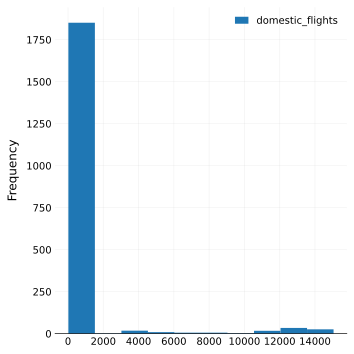

In [107]:
#| include: false
ax = data_sql_1.plot(y="domestic_flights", kind="hist", linewidth=0)

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.set_axisbelow(True)
ax.grid(zorder=0)

<Axes: xlabel='day'>

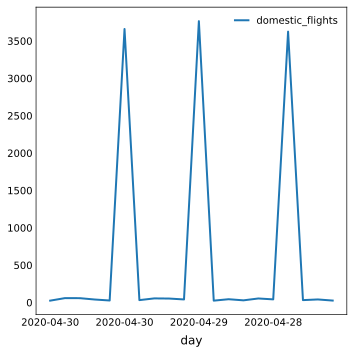

In [108]:
#| include: false
data_sql_2 = pd.read_sql(
    """
    SELECT country, day, domestic_flights
    FROM airport
    WHERE domestic_flights > 20
    ORDER BY day DESC
    LIMIT 20
    """,
    conn
)

data_sql_2.plot(x="day", y="domestic_flights", kind="line")
# plt.xticks(pd.date_range(
#     start=data_sql_2["day"].min(),
#     end=data_sql_2["day"].max(),
#     periods=5
# ))

In [109]:
#| include: false
# conn.close()

In [ ]:
#| include: false
CREATE TABLE employees (
    id INT PRIMARY KEY,
    name VARCHAR(50),
    position VARCHAR(50)
);

In [ ]:
#| include: false
INSERT INTO employees (id, name, position)
VALUES (1, 'Alice Johnson', 'Software Engineer'),
       (2, 'Bob Smith', 'Data Analyst'),
       (3, 'Charlie Brown', 'Project Manager');

In [ ]:
#| include: false
SELECT name
FROM employees